In [38]:
import pandas as pd
import numpy as np

### Import make moons dataset

In [39]:
from sklearn.datasets import make_moons

In [40]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

### Split data into test train

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Scale Data

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Initialize SVM with default parameter

In [46]:
from sklearn import svm

In [47]:
svm_model = svm.SVC()

### Train the model

In [48]:
svm_model.fit(X_train,y_train)

SVC()

In [49]:
y_pred = svm_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.91


### Plot the decision boundary and data points

In [52]:
from matplotlib import pyplot as plt

In [53]:
# Plot the decision boundary and data points
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

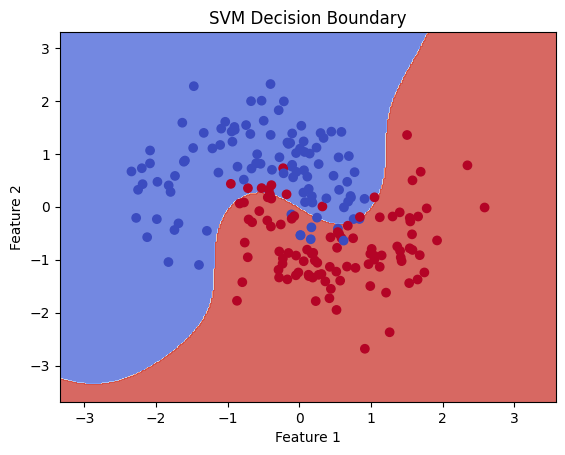

In [54]:
plot_decision_boundary(svm_model, X_test, y_test)

### Explore SVM Parameter

In [55]:
parameters_to_explore = {
    'C' : [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale','auto'],
    'degree':[2,3,4]
}

In [57]:
for C in parameters_to_explore['C']:
    for kernel in parameters_to_explore['kernel']:
        for gamma in parameters_to_explore['gamma']:
            if kernel == 'poly':
                for degree in parameters_to_explore['degree']:
                    svm_model = svm.SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)
                    svm_model.fit(X_train, y_train)
                    y_pred = svm_model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)
                    print(f"C: {C}, Kernel: {kernel}, Gamma: {gamma}, Degree: {degree}, Accuracy: {accuracy}")
            else:
                svm_model = svm.SVC(C=C, kernel=kernel, gamma=gamma)
                svm_model.fit(X_train, y_train)
                y_pred = svm_model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                print(f"C: {C}, Kernel: {kernel}, Gamma: {gamma}, Accuracy: {accuracy}")

C: 0.1, Kernel: linear, Gamma: scale, Accuracy: 0.82
C: 0.1, Kernel: linear, Gamma: auto, Accuracy: 0.82
C: 0.1, Kernel: poly, Gamma: scale, Degree: 2, Accuracy: 0.515
C: 0.1, Kernel: poly, Gamma: scale, Degree: 3, Accuracy: 0.81
C: 0.1, Kernel: poly, Gamma: scale, Degree: 4, Accuracy: 0.455
C: 0.1, Kernel: poly, Gamma: auto, Degree: 2, Accuracy: 0.515
C: 0.1, Kernel: poly, Gamma: auto, Degree: 3, Accuracy: 0.81
C: 0.1, Kernel: poly, Gamma: auto, Degree: 4, Accuracy: 0.455
C: 0.1, Kernel: rbf, Gamma: scale, Accuracy: 0.875
C: 0.1, Kernel: rbf, Gamma: auto, Accuracy: 0.875
C: 0.1, Kernel: sigmoid, Gamma: scale, Accuracy: 0.73
C: 0.1, Kernel: sigmoid, Gamma: auto, Accuracy: 0.73
C: 1, Kernel: linear, Gamma: scale, Accuracy: 0.82
C: 1, Kernel: linear, Gamma: auto, Accuracy: 0.82
C: 1, Kernel: poly, Gamma: scale, Degree: 2, Accuracy: 0.51
C: 1, Kernel: poly, Gamma: scale, Degree: 3, Accuracy: 0.81
C: 1, Kernel: poly, Gamma: scale, Degree: 4, Accuracy: 0.455
C: 1, Kernel: poly, Gamma: auto,

Breaking down the results and understand the impact of different SVM parameters:

1. **C (Regularization Parameter)**:
   - **C: 0.1**: Lower regularization strength, allowing more slack for misclassifications. This can lead to underfitting.
   - **C: 1**: Moderate regularization strength, balancing between bias and variance.
   - **C: 10**: Higher regularization strength, aiming for fewer misclassifications but can lead to overfitting.

2. **Kernel**:
   - **linear**: Linear decision boundary. Consistent accuracy around 0.82 across different C values.
   - **poly (Polynomial)**: Non-linear decision boundary. Performance varies significantly with the degree of the polynomial.
     - Degree 2: Lower accuracy (around 0.51).
     - Degree 3: Better accuracy (around 0.81).
     - Degree 4: Lower accuracy (around 0.455).
   - **rbf (Radial Basis Function)**: Non-linear decision boundary. Generally performs well with higher accuracy (up to 0.925).
   - **sigmoid**: Non-linear decision boundary similar to neural networks. Lower accuracy compared to rbf and linear kernels.

3. **Gamma**:
   - **scale**: Default value, uses \( \frac{1}{\text{number of features}} \). Generally performs well.
   - **auto**: Uses \( \frac{1}{\text{number of samples}} \). Similar performance to scale in this case.

4. **Degree (for poly kernel)**:
   - Higher degrees can capture more complex patterns but may lead to overfitting, as seen with degrees 2 and 4 having lower accuracy compared to degree 3.

### Insights:
- The **rbf kernel** generally provides the best performance, especially with higher C values.
- The **linear kernel** is consistent but may not capture complex patterns as effectively as rbf.
- The **poly kernel**'s performance is highly dependent on the degree, with degree 3 being a sweet spot in this case.
- The choice of **gamma** (scale vs auto) doesn't significantly impact performance in this dataset.